## Introduction





# Web scraping and parsing the data

In [1]:
import requests                    #The requests library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application

from bs4 import BeautifulSoup     # One of them is Beautiful Soup, which is a python library for pulling data out of HTML and XML files. It creates data parse trees in order to get data easily.
import pandas as pd

In [2]:
years = list(range(1991,2022))

In [3]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

In [4]:
for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("mvp/{}.html".format(year),"w+",encoding="utf-8") as f: # using / after mvp to hold files in that particular folder, encoder utf-8 is used to decode the file)
        f.write(data.text)

In [5]:
with open("mvp/1991.html", encoding="utf-8") as f:
    page = f.read()

In [6]:
soup = BeautifulSoup(page,"html.parser") #soup object is created to parse the html page

In [7]:
soup.find('tr', class_ = "over_header").decompose() # (syntax used:class_) remove the header rows so that it doesnt messup with the pandas data frame(using decompose)

In [8]:
mvp_table = soup.find(id = "mvp") #we assign the specific id to find the elements under that id

In [9]:
mvp_1991 = pd.read_html(str(mvp_table))[0]     # pandas can be used to extract read_html file (has to be a string format)

In [10]:
mvp_1991

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
5,6,Clyde Drexler,28,POR,1.0,75.0,960,0.078,82,34.8,21.5,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209
6,7,Kevin Johnson,24,PHO,0.0,32.0,960,0.033,77,36.0,22.2,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220
7,8,Dominique Wilkins,31,ATL,0.0,29.0,960,0.030,81,38.0,25.9,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177
8,9T,Larry Bird,34,BOS,0.0,25.0,960,0.026,60,38.0,19.4,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140
9,9T,Terry Porter,27,POR,0.0,25.0,960,0.026,81,32.9,17.0,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235


In [11]:
dfs =[]                # now we are parsing html pages for the range of years and eppending it in a dataframe
for year in years:
    with open("mvp/{}.html".format(year), encoding="utf-8") as f:  #.format(year)
        page = f.read()
        soup = BeautifulSoup(page,"html.parser") 
        soup.find('tr', class_ = "over_header").decompose()
        mvp_table = soup.find(id = "mvp")
        mvp = pd.read_html(str(mvp_table))[0] 
        mvp["Year"] = year # we are adding year column in the dataframe
        dfs.append(mvp)
    

In [12]:
dfs

[   Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
 0     1     Michael Jordan   27  CHI   77.0    891.0      960  0.928  82   
 1     2      Magic Johnson   31  LAL   10.0    497.0      960  0.518  79   
 2     3     David Robinson   25  SAS    6.0    476.0      960  0.496  82   
 3     4    Charles Barkley   27  PHI    2.0    222.0      960  0.231  67   
 4     5        Karl Malone   27  UTA    0.0    142.0      960  0.148  82   
 5     6      Clyde Drexler   28  POR    1.0     75.0      960  0.078  82   
 6     7      Kevin Johnson   24  PHO    0.0     32.0      960  0.033  77   
 7     8  Dominique Wilkins   31  ATL    0.0     29.0      960  0.030  81   
 8    9T         Larry Bird   34  BOS    0.0     25.0      960  0.026  60   
 9    9T       Terry Porter   27  POR    0.0     25.0      960  0.026  81   
 10   11      Patrick Ewing   28  NYK    0.0     20.0      960  0.021  81   
 11   12      John Stockton   28  UTA    0.0     15.0      960  0.016  82   

In [13]:
mvps = pd.concat(dfs) # concatenating/combining the dataframes in one

In [14]:
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [15]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [16]:
mvps.to_csv = ("mvps_csv") # mvps csv

In [17]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

url = player_stats_url.format(1991)
data = requests.get(url)
with open("mvp/1991.html","w+",encoding="utf-8") as f:
    f.write(data.text)

In [18]:
url = player_stats_url.format(1991)

In [19]:
# in order to scrape the javascript of the website we use selenium

In [20]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [21]:
from selenium import webdriver      
#Selenium is a Python library and tool used for automating web browsers to do a number of tasks. One of such is web-scraping to extract useful data and information that may be otherwise unavailable.
#Selenium is actually a suite of testing tools, but the tool everyone uses for web scraping is Selenium WebDriver. WebDriver is responsible for automated, cross-browser testing. Because it's automated, WebDriver can be used for web scraping in a similar fashion to other automated web scraping bots

In [22]:
driver = webdriver.Chrome(executable_path="C:/Users/Naman Kapoor/Desktop/Web scrapping and Crawling/chromedriver")

C:\Users\NAMANK~1\AppData\Local\Temp/ipykernel_10528/1979448282.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/Users/Naman Kapoor/Desktop/Web scrapping and Crawling/chromedriver")


In [23]:
import time
year = 1991

url = player_stats_url.format(year)

driver.get(url)

driver.execute_script("window.scrollTo(1,10000)")  #window.scrollTo is a javascript command tells the table to scroll down whch will render the whole table

time.sleep(2)


html = driver.page_source



In [24]:
with open("mvp/{}.html".format(year),"w+",encoding="utf-8") as f:
    f.write(html)

In [25]:

for year in years:
    

    url = player_stats_url.format(year)


    driver.get(url)

    driver.execute_script("window.scrollTo(1,10000)")  #window.scrollTo is a javascript command tells the table to scroll down whch will render the whole table

    time.sleep(2)


    html = driver.page_source
    with open("mvp/{}.html".format(year),"w+",encoding="utf-8") as f:
        f.write(html)


In [26]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

In [27]:
player_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,2021


In [28]:
players = pd.concat(dfs)  # concatenating the dataframes using pandas

In [29]:
players.to_csv('players.csv') # a player csv file

In [30]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [31]:
# parsing all the team html files form 1991 to 2021
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+",encoding = "utf-8") as f:
        f.write(data.text)

In [32]:
dfs = []
for year in years:
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"] #for deleting the specific keys since we are concatenating the western and eastern columns
    dfs.append(w_df)

In [33]:
teams = pd.concat(dfs)

In [34]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [35]:
teams.to_csv("teams.csv") # a csv file

# Data Cleaning

In [36]:
# cleaning the mvp data
mvps = pd.read_csv("C:/Users/Naman Kapoor/Desktop/mvps.csv")

In [37]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6,476,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0,142,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,11,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,12,13T,James Harden,31,TOT,0,1,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13,13T,LeBron James,36,LAL,0,1,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [38]:
mvps = mvps[["Player","Year","Pts Won","Pts Max","Share"]] # selecting the required columns only

In [39]:
# cleaning the players data
players = pd.read_csv("C:/Users/Naman Kapoor/Desktop/players.csv")

In [40]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [41]:
players
del players["Unnamed: 0"]  # deleting specific column from the player table

In [42]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [43]:
players["Player"] = players["Player"].str.replace("*","", regex=False) # removing the asterik from the data and replacing it with a space""

In [44]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [45]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [46]:
# we will perform groupby operation on this table ( so that the players who have more than one record are grouped together)
players[players["Player"]=="Greg Anderson"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,9,Greg Anderson,PF,26,NJN,1,0,18,4,4,...,4,2,6,1,2,0,1,4,8,1991
11,9,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991
467,9,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,...,4.1,7.4,11.5,1,1.1,0.8,2.5,3.2,11.5,1992
1412,9,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,...,2.4,5,7.4,0.7,0.7,0.9,1.2,3,6.4,1994
1911,8,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2,2.9,1995
2381,9,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,9,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,7,Greg Anderson,C,33,ATL,50,0,8,0.7,1.6,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [47]:
players.groupby(['Player', 'Year']).get_group(("Greg Anderson", 1991))  # we will perform groupby operation on this table ( so that the players who have more than one record are grouped together)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,9,Greg Anderson,PF,26,NJN,1,0,18,4,4,...,4,2,6,1,2,0,1,4,8,1991
11,9,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [48]:
def single_row(df):                # if there is only one row per group then it will return the single row
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]          # it will replace the TOT row of Tm with the last possible row for that particualr player
        return row

players = players.groupby(["Player", "Year"]).apply(single_row)

In [49]:
players.head(20)

Rk         Player Pos Age   Tm   G  GS    MP   FG  \
Player        Year                                                             
A.C. Green    1991 164    135     A.C. Green  PF  27  LAL  82  21  26.4  3.1   
              1992 633    141     A.C. Green  PF  28  LAL  82  53  35.4  4.7   
              1993 1092   137     A.C. Green  PF  29  LAL  82  55  34.4  4.6   
              1994 1579   149     A.C. Green  PF  30  PHO  82  55  34.5  5.7   
              1995 2067   142     A.C. Green  SF  31  PHO  82  52  32.8  3.8   
              1996 2563   147     A.C. Green  SF  32  PHO  82  36  25.8  2.6   
              1997 3138   147     A.C. Green  PF  33  DAL  83  73    30  2.8   
              1998 3725   153     A.C. Green  PF  34  DAL  82  68  32.3    3   
              1999 4283   146     A.C. Green  PF  35  DAL  50  35  18.5  2.2   
              2000 4811   154     A.C. Green  PF  36  LAL  82  82  23.5  2.1   
              2001 5330   152     A.C. Green  PF  37  MIA  82   1  17.2  1.8   
A.J. Bramlett 2000 4684    47  A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   
A.J. English  1991 127    105   A.J. English  SG  23  WSB  70  12  20.6  3.6   
              1992 597    112   A.J. English  SG  24  WSB  81   6  20.6  4.5   
A.J. Guyton   2001 5333   155    A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   
              2002 5886   160    A.J. Guyton  PG  23  CHI  45   6  13.5    2   
              2003 6393   146    A.J. Guyton  PG  24  GSW   2   0   4.5    0   
A.J. Hammons  2017 14814  171   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   
A.J. Price    2010 10727  335     A.J. Price  PG  23  IND  56   2  15.4  2.6   
              2011 11356  339     A.J. Price  PG  24  IND  50   0  15.9  2.3   

                           FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1991 164     6.6  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 633     9.8  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 1092    8.6  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1579   11.3  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 2067    7.5  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2563    5.4  ...    2  4.7  6.8  0.9  0.5  0.3    1  1.7   
              1997 3138    5.8  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3725    6.5  ...  2.7  5.5  8.1  1.5    1  0.3  0.8  1.9   
              1999 4283    5.1  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4811    4.7  ...    2    4  5.9    1  0.6  0.2  0.6  1.5   
              2001 5330      4  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4684    2.6  ...  1.5  1.3  2.8    0  0.1    0  0.4  1.6   
A.J. English  1991 127     8.2  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 597    10.4  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1    2   
A.J. Guyton   2001 5333    5.8  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5886    5.4  ...  0.3  0.7    1  1.8  0.2  0.2  0.8  0.5   
              2003 6393      2  ...    0    0    0    1  0.5    0  0.5    0   
A.J. Hammons  2017 14814   1.9  ...  0.4  1.3  1.6  0.2    0  0.6  0.5    1   
A.J. Price    2010 10727   6.3  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 11356   6.4  ...  0.3  1.1  1.4  2.2  0.6    0  1.1  1.2   

                           PTS  Year  
Player        Year                    
A.C. Green    1991 164     9.1  1991  
              1992 633    13.6  1992  
              1993 1092   12.8  1993  
              1994 1579   14.7  1994  
              1995 2067   11.2  1995  
              1996 2563    7.5  1996  
              1997 3138    7.2  1997  
              1998 3725    7.3  1998  
              1999 4283    4.9  1999  
              2000 4811      5  2000  
              2001 5330    4.5  2001  
A.J. Bramlett 2000 4

In [50]:
players.index = players.index.droplevel() # use to drop a multi index level ( in this case it is year and player)

In [51]:
players.index = players.index.droplevel()

In [52]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,336,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,...,1.1,2.8,3.9,0.5,0.4,1,1.1,2.6,6.9,2002
6595,316,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,...,0.9,2.2,3.1,0.3,0.2,0.6,1,2.6,6.6,2003
7176,338,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,...,1,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7776,350,Željko Rebrača,C,32,LAC,58,2,16,2.3,4,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [53]:
# we'll now combine players data with mvp

combined = players.merge(mvps, how = "outer", on=['Player','Year']) # considering outer merge so that we can keep columns with players who havent won mvps

In [54]:
combined.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


In [55]:
combined[["Pts Won","Pts Max","Share"]] = combined[["Pts Won","Pts Max","Share"]].fillna(0) # it will fill the nan values in here with 0

In [56]:
combined[combined["Pts Won"]>0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
187,231,Al Jefferson,C,29,CHA,73,73,35,9.6,18.8,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,178,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,178,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22,...,4.6,2.3,0.1,3.5,2,26.8,1999,319.0,1180.0,0.270
332,187,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,186,Allen Iverson,SG,25,PHI,71,71,42,10.7,25.5,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,70,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,65,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,75,Vince Carter,SF-SG,28,NJN,77,76,36.7,9,20,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,276,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [57]:
combined.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0


In [58]:
# cleaning the teams data

In [59]:
teams = pd.read_csv("C:/Users/Naman Kapoor/Desktop/teams.csv")

In [60]:
teams


,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1028,13,42,30,0.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
1029,14,38,34,0.528,4,113.3,112.3,1.07,2021,Memphis Grizzlies*
1030,15,33,39,0.458,9,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,16,31,41,0.431,11,114.6,114.9,-0.2,2021,New Orleans Pelicans


In [61]:
teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,0.744,—,110,101,8.57,1991,Chicago Bulls*
8,8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*


In [62]:
teams = teams[~teams["W"].str.contains("Division")]  # str contains "division under "W" column will be removed

In [63]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,0.744,—,110,101,8.57,1991,Chicago Bulls*
8,8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*
10,10,43,39,0.524,18,109.8,109,0.72,1991,Atlanta Hawks*


In [64]:
teams["Team"] = teams["Team"].str.replace('*',"", regex= False)

C:\Users\NAMANK~1\AppData\Local\Temp/ipykernel_10528/3869580432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace('*',"", regex= False)


In [65]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1028,13,42,30,0.583,—,112.4,110.2,2.26,2021,Dallas Mavericks
1029,14,38,34,0.528,4,113.3,112.3,1.07,2021,Memphis Grizzlies
1030,15,33,39,0.458,9,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,16,31,41,0.431,11,114.6,114.9,-0.2,2021,New Orleans Pelicans


In [66]:
names = teams["Team"].unique()
(names)

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [67]:
abbrev = combined["Tm"].unique()
(abbrev)

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'POR', 'DET', 'PHI', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'OKC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [68]:
#df = pd.DataFrame({'Names':names, 'Abbreviations':abbrev})
#df.to_csv('nicknames.csv', index=False)
#to create a file we can first put it into a data frame and then use to_csv to convert the file

In [69]:
nicknames = {}
with open("C:/Users/Naman Kapoor/Downloads/Nick.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").replace("\"", "").split(",") #removing double quotes and using .replace( we use \". to indicate that we need to remove the specific thing)
        nicknames[abbrev] = name

In [70]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [71]:

#import csv
#with open('nicknames.csv', 'w', encoding = 'UTF-8') as f:
    #writer = csv.writer(f)
    
    
   # writer.writerow(words)
   # writer.writerow(abbr)


In [72]:
combined["Team"] = combined["Tm"].map(nicknames)  # mapping the nicknames 

In [73]:
combined.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


In [74]:
stats = combined.merge(teams, how="outer",on=["Team", "Year"])

In [75]:
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,Los Angeles Lakers,10,58,24,0.707,5,106.3,99.6,6.73
1,301,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,Los Angeles Lakers,10,58,24,0.707,5,106.3,99.6,6.73
2,51,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,Los Angeles Lakers,10,58,24,0.707,5,106.3,99.6,6.73
3,330,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,Los Angeles Lakers,10,58,24,0.707,5,106.3,99.6,6.73
4,384,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,Los Angeles Lakers,10,58,24,0.707,5,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,185,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
14088,331,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
14089,239,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
14090,281,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45


In [76]:
del stats["Unnamed: 0"]

In [77]:
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5,106.3,99.6,6.73
1,301,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5,106.3,99.6,6.73
2,51,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5,106.3,99.6,6.73
3,330,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5,106.3,99.6,6.73
4,384,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,185,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14088,331,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14089,239,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14090,281,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45


In [78]:
stats.dtypes   #we will convert object dtypes to numerical dtypes for machine learning

Rk          object
Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [79]:
stats = stats.apply(pd.to_numeric, errors = "ignore") # it will convert every element in stats to numeric and if it is numeric it wont do anything

In [80]:
stats.dtypes

Rk           int64
Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [81]:
stats["GB"].unique()

array(['5', '14', '23', '7', '—', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '28', '25', '8', '19', '1', '13', '17', '3', '15', '9',
       '2', '35', '20', '11', '16', '41', '12', '50', '10', '30', '34',
       '4', '1.5', '22', '51', '36', '43', '39', '18.5', '48', '46',
       '10.5', '32', '38', '27', '33', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [82]:
stats["GB"] = stats["GB"].replace("—","0") # this is doen to convert the the data types of GB to numeric

In [83]:
stats["GB"].unique()

array(['5', '14', '23', '7', '0', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '28', '25', '8', '19', '1', '13', '17', '3', '15', '9',
       '2', '35', '20', '11', '16', '41', '12', '50', '10', '30', '34',
       '4', '1.5', '22', '51', '36', '43', '39', '18.5', '48', '46',
       '10.5', '32', '38', '27', '33', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [84]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [85]:
stats["GB"]

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
14087    9.0
14088    9.0
14089    9.0
14090    9.0
14091    9.0
Name: GB, Length: 14092, dtype: float64

In [86]:
stats.to_csv("stats.csv")

In [87]:
highest_scoring = stats[stats["GB"]> 70].sort_values("PTS", ascending = False).head(10)

In [88]:
highest_scoring

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS


In [89]:
#highest_scoring.plot.bar("Player","PTS")

<AxesSubplot:ylabel='Frequency'>

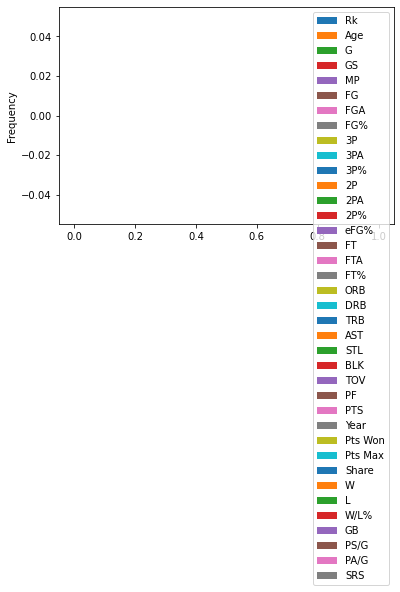

In [90]:
highest_scoring.plot.hist("Player")

In [91]:
stats.groupby("Year").apply(lambda x: x.sort_values("PTS",ascending = False)).head()

Rk           Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
Year                                                                      ...   
1991 9927   175   Michael Jordan  SG   27  CHI  82  82  37.0  12.1  22.4  ...   
     7313   212      Karl Malone  PF   27  UTA  82  82  40.3  10.3  19.6  ...   
     181    182     Bernard King  SF   34  WSB  64  64  37.5  11.1  23.6  ...   
     6394    21  Charles Barkley  SF   27  PHI  67  67  37.3   9.9  17.4  ...   
     12129  107    Patrick Ewing   C   28  NYK  81  81  38.3  10.4  20.3  ...   

            Pts Max  Share                Team   W   L   W/L%    GB   PS/G  \
Year                                                                         
1991 9927     960.0  0.928       Chicago Bulls  61  21  0.744   0.0  110.0   
     7313     960.0  0.148           Utah Jazz  54  28  0.659   1.0  104.0   
     181      960.0  0.007  Washington Bullets  30  52  0.366  26.0  101.4   
     6394     960.0  0.231  Philadelphia 76ers  44  38  0.537  12.0  105.4   
     12129    960.0  0.021     New York Knicks  39  43  0.476  17.0  103.1   

             PA/G   SRS  
Year                     
1991 9927   101.0  8.57  
     7313   100.7  3.18  
     181    106.4 -4.84  
     6394   105.6 -0.39  
     12129  103.3 -0.43  

[5 rows x 42 columns]

In [92]:
 #def highest_pts(df):
#    return x.sort_values("PTS", ascending = False).head(1)

In [93]:
stats["Share"].unique()

array([0.   , 0.518, 0.005, 0.001, 0.091, 0.007, 0.002, 0.998, 0.02 ,
       0.026, 0.01 , 0.015, 0.027, 0.961, 0.955, 0.327, 0.27 , 0.109,
       0.904, 0.023, 0.07 , 0.189, 0.386, 0.404, 0.017, 0.372, 0.021,
       0.03 , 0.712, 0.014, 0.352, 0.008, 0.138, 0.055, 0.045, 0.507,
       0.011, 0.075, 0.003, 0.857, 0.004, 0.726, 0.701, 0.258, 0.577,
       0.487, 0.048, 0.14 , 0.025, 0.036, 0.435, 0.425, 0.08 , 0.205,
       0.068, 0.078, 0.584, 0.275, 0.55 , 0.042, 0.449, 0.344, 0.081,
       0.746, 0.582, 0.156, 0.032, 0.173, 0.056, 0.05 , 0.207, 0.061,
       0.655, 0.303, 0.034, 0.813, 0.084, 0.067, 0.211, 0.135, 0.006,
       0.757, 0.839, 0.739, 0.785, 0.04 , 0.393, 0.166, 0.049, 0.073,
       0.142, 0.348, 0.969, 0.98 , 0.038, 1.   , 0.051, 0.337, 0.024,
       0.053, 0.922, 0.065, 0.009, 0.484, 0.986, 0.271, 0.112, 0.371,
       0.879, 0.231, 0.033, 0.33 , 0.873, 0.354, 0.291, 0.052, 0.31 ,
       0.359, 0.627, 0.152, 0.016, 0.148, 0.286, 0.022, 0.576, 0.319,
       0.043, 0.347,

In [94]:
stats.corr()["Share"]

Rk        -0.015812
Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.065789
3P         0.096225
3PA        0.096460
3P%        0.013611
2P         0.275976
2PA        0.251885
2P%        0.063240
eFG%       0.059335
FT         0.316392
FTA        0.321457
FT%        0.037875
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071045
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

<AxesSubplot:>

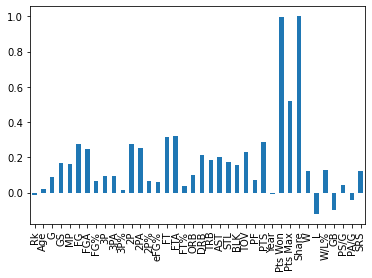

In [95]:
stats.corr()["Share"].plot.bar()

# Applying Machine Learning Model

In [96]:
# reading the final merged file

statss = pd.read_csv("C:/Users/Naman Kapoor/Desktop/player_mvp_stats.csv")

In [97]:
statss

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [98]:
del statss["Unnamed: 0"]

In [99]:
statss

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [100]:
pd.isnull(statss).sum()    # finding the null values using pandas and using sum argument to read it easily


Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [101]:
statss = statss.fillna(0)

In [102]:
statss

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [103]:

statss.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [104]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'] 
# we include only numeric values , here we are trying to predict the percentage share of mvp votes that a person has got in an year
# we are trying to predict the share value and will remove that value and the  values that correlate with it

In [105]:


train = statss[statss["Year"] < 2021] # taking the train data less than 2021

In [106]:
test = statss[statss["Year"] == 2021] # taking the test data for thr year 2021

In [107]:
#Cost Function = RSS(W) = Σ [Yᵢ — 𝔽(Xᵢ)]²
# The whole idea of linear regression model revolves around minimizing the above cost function’s value. Lower the cost function value, better the linear regression model.

#Generally, to decrease the cost function, we increase the number of features in our model. As we keep on increasing the features in model, model starts fitting the training data set well and cost function value starts decreasing.

#But, with increase in number of features; our equations becomes a higher order polynomial equation; and it leads to overfitting of the data.
#Σ runs from i=0 to i = N where N is the total number of observations.
#Yᵢ is the known value of iᵗʰ observation.
#𝔽(Xᵢ) gives the predicted value of iᵗʰ observation.
#RSS stands for Residual Sum of Squares
#we can see the overfitted model performs well on training data set and cost function is zero for training data set

#coefficients’ value ( W ). Generally when overfitting happens, these coefficients’ values becomes very huge.
#Ridge regression is used to quantify the overfitting of the data through measuring the magnitude of coefficients.

In [108]:
# we will use Ridge regression now.


#Total Cost Function = Measure of fit of model + Measure of magnitude                    of coefficient
#Measure of fit of model = RSS(W)
#Measure of magnitude of coefficient = ||W||²
#If Measure of fit of the model is a small value that means model is well fit to the data.
#If Measure of magnitude of coefficient is a small value that means model is not overfit.
#Total Cost Function = RSS(W) + λ*||W||²
#We have added λ in total cost function as a tuning parameter to balance the fit of data and magnitude of coefficients.

In [109]:
from sklearn.linear_model import Ridge # ridge will minimse the coeff. values in order to reduce overfitting

In [110]:
reg = Ridge(alpha = 0.1) # alpha controls the changing of the coefficient

In [111]:
reg.fit(train[predictors], train["Share"])  # xtrain = predictors , y train = share

Ridge(alpha=0.1)

In [112]:
predictions = reg.predict(test[predictors])

In [113]:
predictions = pd.DataFrame(predictions , columns = ["Predictions"], index = test.index) # converting predicitons(array) to a dataframe

In [114]:
predictions

,Predictions
630,0.000309
631,-0.000434
632,-0.000136
633,0.000310
634,0.001090
...,...
13897,-0.000552
13898,-0.000143
13899,0.001085
13900,-0.000897


In [115]:
combinations = pd.concat([test[["Player", "Share"]],predictions],axis = 1) # axis = 1 for combining columns

In [116]:
combinations

,Player,Share,Predictions
630,Aaron Gordon,0.0,0.000309
631,Austin Rivers,0.0,-0.000434
632,Bol Bol,0.0,-0.000136
633,Facundo Campazzo,0.0,0.000310
634,Greg Whittington,0.0,0.001090
...,...,...,...
13897,Patty Mills,0.0,-0.000552
13898,Quinndary Weatherspoon,0.0,-0.000143
13899,Rudy Gay,0.0,0.001085
13900,Tre Jones,0.0,-0.000897


In [117]:
combinations.sort_values("Share",ascending = "False").head(10)

,Player,Share,Predictions
630,Aaron Gordon,0.0,0.000309
10668,Cody Zeller,0.0,0.001353
10667,Cody Martin,0.0,-0.000259
10666,Caleb Martin,0.0,0.000619
10665,Brad Wanamaker,0.0,0.000386
10664,Bismack Biyombo,0.0,-0.000762
9919,Thanasis Antetokounmpo,0.0,0.000236
9918,Sam Merrill,0.0,0.000045
9917,Rodions Kurucs,0.0,0.000492
9916,Pat Connaughton,0.0,-0.000030


In [118]:
from sklearn.metrics import mean_squared_error


mean_squared_error(combinations['Share'], combinations["Predictions"])

5.3699020484044286e-05

In [119]:
combinations["Share"].value_counts() # this shows that 525 players did not get an mvp, this error metric doesnt make much sense

0.000    525
0.001      3
0.961      1
0.138      1
0.010      1
0.020      1
0.449      1
0.005      1
0.038      1
0.003      1
0.580      1
0.345      1
0.042      1
0.008      1
Name: Share, dtype: int64

In [120]:
actual = combinations.sort_values("Share", ascending=False)
predicted = combinations.sort_values("Predictions", ascending=False)
actual["Rk"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rk"] = list(range(1,predicted.shape[0]+1))

In [121]:
actual.merge(predicted, on="Player").head(5)

,Player,Share_x,Predictions_x,Rk,Share_y,Predictions_y,Predicted_Rk
0,Nikola Jokić,0.961,0.832090,1,0.961,0.832090,1
1,Joel Embiid,0.580,0.504221,2,0.580,0.504221,2
2,Stephen Curry,0.449,0.388256,3,0.449,0.388256,3
3,Giannis Antetokounmpo,0.345,0.303106,4,0.345,0.303106,4
4,Chris Paul,0.138,0.118696,5,0.138,0.118696,5


In [122]:
pd.isnull(actual).sum()

Player         0
Share          0
Predictions    0
Rk             0
dtype: int64

In [123]:
combinations.shape

(540, 3)

In [124]:
def find_ap(combinations):
    actual = combinations.sort_values("Share", ascending=False).head(5)
    predicted = combinations.sort_values("Predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [125]:
ap = find_ap(combinations)

In [126]:
ap

1.0

In [127]:
# implementing backtesting lgorithm to find the error (What is backtesting algorithm?
#Backtesting a trading algorithm means to run the algorithm against historical data and study its performance.)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Year,Pts Won,Pts Max,W,L,W/L%,GB,PS/G,PA/G,SRS
0,27,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
1,29,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
4,29,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
5,32,48,2,10.3,1.1,2.6,0.432,0.3,0.7,0.424,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
6,31,79,79,37.1,5.9,12.4,0.477,1.0,3.2,0.320,...,1991,497.0,960.0,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,28,82,63,26.2,3.7,8.8,0.423,0.0,0.1,0.182,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14036,26,82,0,13.2,2.0,4.6,0.447,0.4,1.1,0.356,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14038,30,84,18,25.0,4.4,10.0,0.440,0.0,0.0,0.000,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14039,28,47,3,9.1,0.8,1.7,0.488,0.0,0.0,0.500,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85


In [134]:
train[predictors]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Year,Pts Won,Pts Max,W,L,W/L%,GB,PS/G,PA/G,SRS
0,27,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
1,29,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
2,22,52,0,7.3,1.1,2.4,0.455,0.0,0.0,NaN,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
3,25,26,0,4.2,0.7,1.9,0.340,0.0,0.0,NaN,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
4,29,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,...,1991,0.0,0.0,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14036,26,82,0,13.2,2.0,4.6,0.447,0.4,1.1,0.356,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14037,26,10,0,14.0,1.8,3.3,0.545,0.0,0.0,NaN,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14038,30,84,18,25.0,4.4,10.0,0.440,0.0,0.0,0.000,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85
14039,28,47,3,9.1,0.8,1.7,0.488,0.0,0.0,0.500,...,1992,0.0,0.0,15,67,0.183,40.0,100.5,107.5,-6.85


In [130]:
train["Share"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14087    0.0
14088    0.0
14089    0.0
14090    0.0
14091    0.0
Name: Share, Length: 13552, dtype: float64

In [137]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year].dropna()
    test = stats[stats["Year"] == year].dropna()
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["Predictions"], index=test.index)
    combinations = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combinations)
    aps.append(find_ap(combinations))

In [138]:
sum(aps)/len(aps)

0.9987179487179486

In [139]:
def add_ranks(combinations):
    combinations = combinations.sort_values("Share",ascending = "False")
    combinations["Rank"] = list(range(1, combinations.shape[0]+1))
    combinations = combinations.sort_values("Predictions",ascending=False)
    combinations["Predicted_Rank"] = list(range(1, combinations.shape[0]+1))
    combinations["Diff"] = combinations["Rank"] - combinations["Predicted_Rank"]
    
    return combinations
    
    
    

In [140]:
add_ranks(all_predictions[1]).sort_values("Diff",ascending = False)


,Player,Share,Predictions,Rank,Predicted_Rank,Diff
1600,Karl Malone,0.857,0.968597,362,1,361
10524,Michael Jordan,0.832,0.938805,361,2,359
908,Grant Hill,0.327,0.367912,360,3,357
4682,Tim Hardaway,0.207,0.232739,359,4,355
8248,Glen Rice,0.117,0.128157,358,5,353
...,...,...,...,...,...,...
8253,Ricky Pierce,0.000,-0.001582,57,350,-293
13156,Tony Massenburg,0.000,-0.001722,62,356,-294
10140,Loren Meyer,0.000,-0.001425,35,332,-297
8254,Tom Chambers,0.000,-0.001783,56,358,-302


In [141]:
ranking = add_ranks(all_predictions[1])

In [142]:
ranking[ranking["Rank"]<5].sort_values("Diff",ascending = False)

,Player,Share,Predictions,Rank,Predicted_Rank,Diff
9841,Cory Alexander,0.0,0.000308,4,30,-26
9845,Dominique Wilkins,0.0,-0.000125,3,62,-59
9846,Greg Anderson,0.0,-0.000760,2,201,-199
85,A.C. Green,0.0,-0.001158,1,293,-292


In [143]:
add_ranks(all_predictions[1])

,Player,Share,Predictions,Rank,Predicted_Rank,Diff
1600,Karl Malone,0.857,0.968597,362,1,361
10524,Michael Jordan,0.832,0.938805,361,2,359
908,Grant Hill,0.327,0.367912,360,3,357
4682,Tim Hardaway,0.207,0.232739,359,4,355
8248,Glen Rice,0.117,0.128157,358,5,353
...,...,...,...,...,...,...
8254,Tom Chambers,0.000,-0.001783,56,358,-302
911,Joe Dumars,0.000,-0.001938,222,359,-137
10391,Sharone Wright,0.000,-0.002092,149,360,-211
4920,Eric Williams,0.000,-0.002292,315,361,-46
